# Model Result Plots
This notebook produces two of the figures in the model section of our final report from experiment logs and our final model.

In [23]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

with open('experiment_log.json', 'r') as f:
    experiment_logs = json.load(f)

# Extract relevant information from log file
extracted_data = []

for log in experiment_logs:
    model_type = log['params']['model_type']
    test_mae = log['metrics']['test_mae']
    test_rmse = log['metrics']['test_rmse']
    extracted_data.append({
        'model_type': model_type,
        'test_mae': test_mae,
        'test_rmse': test_rmse
    })

df = pd.DataFrame(extracted_data)


In [24]:
# Sort by test_mae
df = df.drop_duplicates('model_type').sort_values('test_mae', ascending=False)
df = df.round(1)

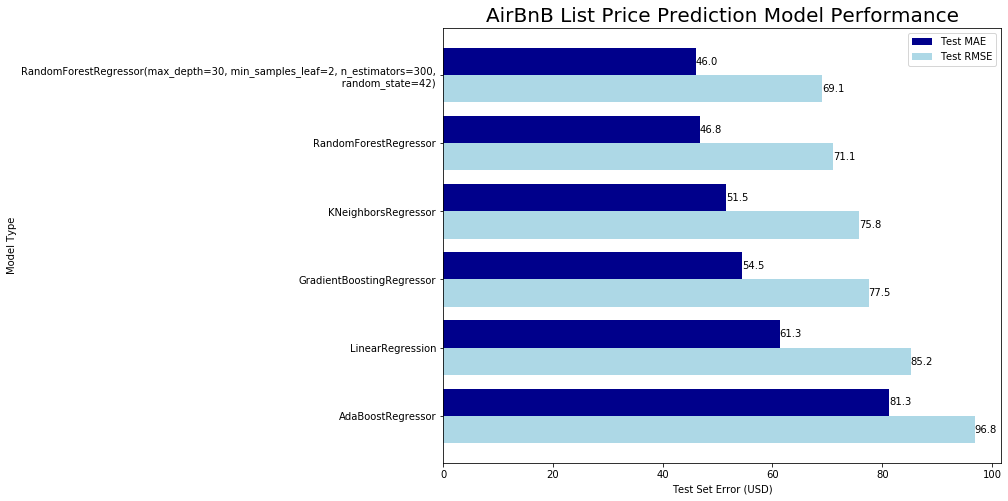

In [25]:
# Create the bar chart
plt.figure(figsize=(10, 8))
# Create an array with the positions of each bar on the y axis
y_pos = np.arange(len(df['model_type']))
# Plot the bars, shifting each bar's position slightly
plt.barh(y_pos + 0.2, df['test_mae'], 0.4, color='darkblue', label='Test MAE')
plt.barh(y_pos - 0.2, df['test_rmse'], 0.4, color='lightblue', label='Test RMSE')

# Add a title and axis titles
plt.title('AirBnB List Price Prediction Model Performance', fontsize=20)
plt.xlabel('Test Set Error (USD)')
plt.ylabel('Model Type')

# Replace the y ticks with the model type
plt.yticks(y_pos, df['model_type'])

# Add numbers to the ends of the bars
for i in range(len(df['model_type'])):
    plt.text(df['test_mae'].iloc[i], y_pos[i] + 0.2, str(df['test_mae'].iloc[i]), va='center')
    plt.text(df['test_rmse'].iloc[i], y_pos[i] - 0.2, str(df['test_rmse'].iloc[i]), va='center')

# Add a legend
plt.legend()

# Show the plot
plt.show()

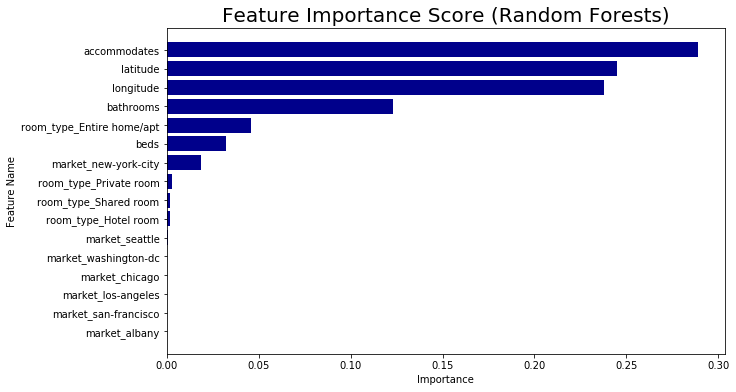

In [26]:
## Create Plot of Feature Importances in in Final Model

# Load the pre-trained model from the file
model = joblib.load('regression_pipeline.joblib')

# Get feature importances
feature_importances =  model.named_steps['regressor'].feature_importances_
#list of features in the model
numerical_features = ['accommodates', 'bathrooms', 'beds', 'latitude', 'longitude']
categorical_features = ["market", "room_type"] 
# Get the one-hot encoded feature names for categorical features
onehot_feature_names = model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names
all_feature_names = numerical_features + onehot_feature_names.tolist()

# Create a dictionary of feature importances
feature_importance_dict = dict(zip(all_feature_names, feature_importances))
feature_importance_df = pd.DataFrame(feature_importance_dict.items(), columns=['Feature', 'Importance']).sort_values('Importance', ascending=False)

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('Importance')

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkblue')

# Add a title and axis titles
plt.title('Feature Importance Score (Random Forests)', fontsize=20)
plt.xlabel('Importance')
plt.ylabel('Feature Name')

# Show the plot
plt.show()